In [32]:
# load libraries
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
import scipy.stats as st
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import tree
from sklearn.externals.six import StringIO
import re
import plotly.plotly as py
import plotly.graph_objs as go
import sys
from sklearn.preprocessing import Imputer
import operator
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [2]:
# TASK 1 - Read Data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
# TASK 2 - Data Cleaning 
data_train = pd.read_csv('train.csv')
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(data_train['LotFrontage'].mode().iloc[0])
data_train['MasVnrType']= data_train['MasVnrType'].fillna("None")
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(data_train['MasVnrArea'].mode().iloc[0])
data_train['Alley'] = data_train['Alley'].fillna("NA")
data_train['MiscFeature'] = data_train['MiscFeature'].fillna("NA")
data_train['Fence'] = data_train['Fence'].fillna("NA")
data_train['PoolQC'] = data_train['PoolQC'].fillna("NA")
data_train['GarageCond'] = data_train['GarageCond'].fillna("NA") 
data_train['GarageQual'] = data_train['GarageQual'].fillna("NA")
data_train['GarageFinish'] = data_train['GarageFinish'].fillna("NA")
data_train['GarageType'] = data_train['GarageType'].fillna("NA")
data_train['FireplaceQu'] =  data_train['FireplaceQu'].fillna("NA")
data_train['BsmtFinType2'] =  data_train['BsmtFinType2'].fillna("NA")
data_train['BsmtQual'] =  data_train['BsmtQual'].fillna("NA")
data_train['BsmtCond'] =  data_train['BsmtCond'].fillna("NA")
data_train['BsmtExposure'] =  data_train['BsmtExposure'].fillna("NA")
data_train['BsmtFinType1'] =  data_train['BsmtFinType1'].fillna("NA")
data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(data_train['GarageYrBlt'].mode().iloc[0])

catData = data_train.select_dtypes(include=['object'])
for x in catData.columns:
    uniqueValues = catData[x].unique()
    mapping = dict(zip(uniqueValues, np.arange(float(len(uniqueValues)))))
    data_train[x] = catData[x].map(mapping)

# data_train.info()
# data_train.head(100)

In [4]:
# Cross - Validation of Data 
kfold = KFold(5, True, 1)

X = data_train.iloc[:,:-1]
# X = X.select_dtypes(include=['int64','float64'])
Y = data_train['SalePrice']

# enumerate splits
for train, val in kfold.split(X):
    X_train = X.iloc[train]
    X_val = X.iloc[val]
    Y_train = Y.iloc[train]
    Y_val = Y.iloc[val]
# X.info()

In [5]:
# Scalar Normalize the values
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)
# sc_Y = StandardScaler()
# Y_train = sc_Y.fit_transform(Y_train)

In [6]:
# Find out the top five columns that are favourable for Regression 
# used correlation coefficient 
corr_dict = {}
for c in X:
    corr_dict[c] = abs(data_train[c].corr(data_train['SalePrice']))

sortedcorr_dict = sorted(corr_dict.items(), key= operator.itemgetter(1))
top_six = sortedcorr_dict[-6:]
top_ten = sortedcorr_dict[-10:]
top_six_columns = []
for t in top_six:
    top_six_columns.append(t[0])
top_ten_columns = []
for t in top_ten:
    top_ten_columns.append(t[0])
top_ten

[('YearRemodAdd', 0.5071009671113865),
 ('YearBuilt', 0.5228973328794969),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('FullBath', 0.5606637627484456),
 ('1stFlrSF', 0.6058521846919148),
 ('TotalBsmtSF', 0.6135805515591954),
 ('GarageArea', 0.6234314389183617),
 ('GarageCars', 0.6404091972583531),
 ('GrLivArea', 0.7086244776126522),
 ('OverallQual', 0.7909816005838047)]

r_squared using 1stFlrSF =  0.36214724112380303
r_squared using TotalBsmtSF =  0.36588889834985244
r_squared using GarageArea =  0.3874068259031088
r_squared using GarageCars =  0.41066860291286283
r_squared using GrLivArea =  0.4946453512940501
r_squared using OverallQual =  0.6249817757263676


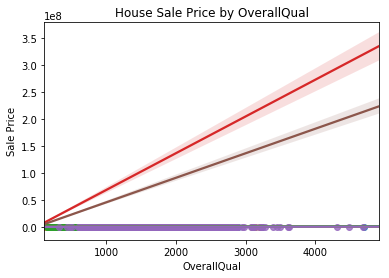

In [7]:
# TASK 4 - Simple Linear Regression
for col in top_six_columns:
    # Show the linear regression graphs for each of the top six columns
    ax = sns.regplot(X[col].values.reshape(-1, 1), Y)
    ax.set(title = 'House Sale Price by '+col, xlabel = col, ylabel = 'Sale Price')

    model = linear_model.LinearRegression()
    scores = cross_val_score(model, X = X[col].values.reshape(-1, 1), y = Y, cv = kfold)
    r_squared = scores.mean()
    print('r_squared using '+col+' = ',scores.mean())
    

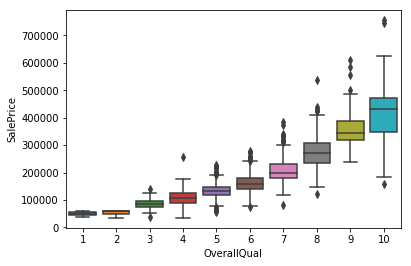

In [10]:
sns.boxplot(x='OverallQual', y='SalePrice', data=data_train)
# sns.countplot(x='OverallQual', hue='SalePrice', data=data_train)

In [ ]:
# TASK 5 - Multi-Linear Regression
# Multi Linear Regression - with 'OverallQual','GrLivArea'
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = X[['OverallQual','GrLivArea']], y = Y, cv = kfold)

r_squared = scores.mean()
n = len(X)
p = 2
adjusted_r_squared = 1-(((1-(r_squared*r_squared))*(n-1))/(n-p-1))
print('r_squared =',scores.mean())
print('adjusted_r_squared =',adjusted_r_squared)

In [126]:
# Multi Linear Regression - with 'OverallQual','GarageCars'
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = X[['OverallQual','GarageCars']], y = Y, cv = kfold)

r_squared = scores.mean()
n = len(X)
p = 2
adjusted_r_squared = 1-(((1-(r_squared*r_squared))*(n-1))/(n-p-1))
print('r_squared =',scores.mean())
print('adjusted_r_squared =',adjusted_r_squared)

r_squared = 0.6685215606554251
adjusted_r_squared = 0.44616187469611535


In [127]:
# Multi Linear Regression - with 'OverallQual','GarageArea'
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = X[['OverallQual','GarageArea']], y = Y, cv = kfold)

r_squared = scores.mean()
n = len(X)
p = 2
adjusted_r_squared = 1-(((1-(r_squared*r_squared))*(n-1))/(n-p-1))
print('r_squared =',scores.mean())
print('adjusted_r_squared =',adjusted_r_squared)

r_squared = 0.6722909638100715
adjusted_r_squared = 0.45122287528494487


In [128]:
# Multi Linear Regression - with 'OverallQual','TotalBsmtSF'
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = X[['OverallQual','TotalBsmtSF']], y = Y, cv = kfold)

r_squared = scores.mean()
n = len(X)
p = 2
adjusted_r_squared = 1-(((1-(r_squared*r_squared))*(n-1))/(n-p-1))
print('r_squared =',scores.mean())
print('adjusted_r_squared =',adjusted_r_squared)

r_squared = 0.6713270896744203
adjusted_r_squared = 0.44992601886172334


In [129]:
# Multi Linear Regression - with 'OverallQual','1stFlrSF'
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = X[['OverallQual','1stFlrSF']], y = Y, cv = kfold)

r_squared = scores.mean()
n = len(X)
p = 2
adjusted_r_squared = 1-(((1-(r_squared*r_squared))*(n-1))/(n-p-1))
print('r_squared =',scores.mean())
print('adjusted_r_squared =',adjusted_r_squared)

r_squared = 0.690886199278172
adjusted_r_squared = 0.4766062712251766


In [130]:
# Multi Linear Regression - with 'OverallQual','GrLivArea','GarageCars'
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = X[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF']], y = Y, cv = kfold)

r_squared = scores.mean()
n = len(X)
p = 4
adjusted_r_squared = 1-(((1-(r_squared*r_squared))*(n-1))/(n-p-1))
print('r_squared =',scores.mean())
print('adjusted_r_squared =',adjusted_r_squared)

r_squared = 0.7497995629206684
adjusted_r_squared = 0.5609958089809217


In [131]:
# Multi Linear Regression - with 'OverallQual','GrLivArea','GarageCars'
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = X[['OverallQual','GrLivArea','GarageCars']], y = Y, cv = kfold)

r_squared = scores.mean()
n = len(X)
p = 3
adjusted_r_squared = 1-(((1-(r_squared*r_squared))*(n-1))/(n-p-1))
print('r_squared =',scores.mean())
print('adjusted_r_squared =',adjusted_r_squared)

r_squared = 0.7340174200948031
adjusted_r_squared = 0.5378312603096416


In [132]:
# This model with predictor variables 'OverallQual','GrLivArea','GarageCars' is determined to be the best 
# among the various combinations of the Multi-Linear Regression as with these 3 variables we acheve 74% r_squared value
# which increases by 1.5% on adding any more or all variable values. Hence, it's optimzed best is with these 3 variables

# We now fit the data to the Best Regression Model
bestRegModel = model
bestRegModel.fit(X = X[['OverallQual','GrLivArea','GarageCars']], y = Y)
data_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [133]:
# TASK 6 - Classification Data Preparation 
data_train['SaleClass'] = data_train['SalePrice']
data_train['SaleClass'].describe()
data_train['SaleClass'] = pd.cut(data_train.SaleClass,[34900, 129975, 163000,214000, 755000],labels=['0','1', '2','3'], include_lowest=True)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleClass
0,1,60,0.0,65.0,8450,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,2,2008,0.0,0.0,208500,2
1,2,20,0.0,80.0,9600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,5,2007,0.0,0.0,181500,2
2,3,60,0.0,68.0,11250,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,9,2008,0.0,0.0,223500,3
3,4,70,0.0,60.0,9550,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,2,2006,0.0,1.0,140000,1
4,5,60,0.0,84.0,14260,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,12,2008,0.0,0.0,250000,3


In [134]:
data_train.groupby(['SaleClass']).describe()

1stFlrSF                                                           \
             count         mean         std    min     25%     50%      75%   
SaleClass                                                                     
0            365.0   909.578082  234.140051  334.0   774.0   892.0  1028.00   
1            367.0  1082.427793  320.058771  520.0   897.5  1053.0  1199.50   
2            366.0  1172.180328  336.238011  495.0   888.0  1172.5  1413.50   
3            362.0  1489.419890  390.004944  764.0  1167.0  1498.0  1712.25   

                  2ndFlrSF               ...   YearRemodAdd         YrSold  \
              max    count        mean   ...            75%     max  count   
SaleClass                                ...                                 
0          1776.0    365.0  192.136986   ...         1979.0  2010.0  365.0   
1          4692.0    367.0  238.193460   ...         2000.0  2009.0  367.0   
2          3138.0    366.0  412.131148   ...         2004.0  2009.0  366.0   
3          3228.0    362.0  547.574586   ...         2006.0  2010.0  362.0   

                                                                          
                  mean       std     min     25%     50%     75%     max  
SaleClass                                                                 
0          2007.876712  1.341899  2006.0  2007.0  2008.0  2009.0  2010.0  
1          2007.828338  1.347113  2006.0  2007.0  2008.0  2009.0  2010.0  
2          2007.806011  1.283432  2006.0  2007.0  2008.0  2009.0  2010.0  
3          2007.751381  1.341459  2006.0  2007.0  2008.0  2009.0  2010.0  

[4 rows x 648 columns]

In [135]:
# TASK 7 - Decision Tree Classifier

# train and test classification model
X = data_train.iloc[:,:-1]
X = data_train[top_six_columns]
Y = data_train['SaleClass']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state = 0)


scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

parameter_grid = {'criterion': ['entropy','gini'],'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

classifier = GridSearchCV(DecisionTreeClassifier(), param_grid = parameter_grid,
                          cv = kfold)

classifier.fit(X, Y)
tree_model = classifier.best_estimator_
print (classifier.best_score_, classifier.best_params_) 

y_pred = classifier.predict(x_test)

# compute accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)

print("accuracy=",accuracy, "\nerror=", error, "\nprecision=", precision, "\nrecall=",recall, "\nF1_score=", F1_score)

0.6910958904109589 {'criterion': 'entropy', 'max_depth': 5, 'max_features': 4}
accuracy= 0.8013698630136986 
error= 0.1986301369863014 
precision= [0.8        0.75       0.85714286 0.78787879] 
recall= [0.77777778 0.71052632 0.8        0.96296296] 
F1_score= [0.78873239 0.72972973 0.82758621 0.86666667]


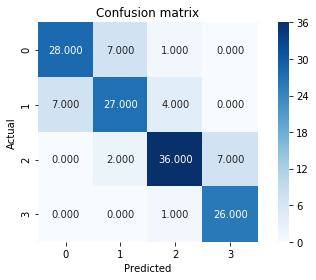

In [137]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [158]:
# KNeighborsClassifier - No feature selection
X = data_train.iloc[:,:-2]

Y = data_train['SaleClass']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.1, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)

Xtest = scaler.transform(Xtest)

bestAccuracy = 0
bestY_Pred = []
topClassifier = KNeighborsClassifier(1)
# bestY_Val = []
Ypred = []
for n in range(1,20):
    for train, val in kfold.split(X):
        x_train = X.iloc[train]
        x_val = X.iloc[val]
        y_train = Y.iloc[train]
        y_val = Y.iloc[val]

        x_train = scaler.transform(x_train)
        x_val = scaler.transform(x_val)
        classifier = KNeighborsClassifier(n)
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_val)    
        accuracy = metrics.accuracy_score(y_val, y_pred)
        if bestAccuracy < accuracy:
            bestAccuracy = accuracy
            bestY_Pred = y_pred     
            bestY_Val = y_val    
            Ypred = classifier.predict(Xtest)
        
    error = 1 - bestAccuracy
    precision = metrics.precision_score(bestY_Val, bestY_Pred, average = None)
    recall = metrics.recall_score(bestY_Val, bestY_Pred, average = None)
    F1_score = metrics.f1_score(bestY_Val, bestY_Pred, average = None)
    print("Neighbour:",n)
    print("Accuracy",bestAccuracy)
    print("Error",error)
    print("Precision",precision)
    print("Recall",recall)
    print("F1 Score",F1_score)
    print("")
# How we chose a value of k:
# For all columns of X 
# In KNN, a small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive
# Here, we are trying for 50 possible k-values in order to determine which K-value is better by using accuaracy as the guage.
# There is a 0.171 increase in accuracy from n(Neigbours)=6 to n(Neigbours)=7, 
# There is only 0.010 increase in accuracy from n(Neigbours)=10 to n(Neigbours)=11 and it doesn't change after that
# If we have the processing power to handle the extra load for 0.010 increase in accuracy, n = 10 can be the choice of number of neighbours
# If we do not, we can stop with n=7.

Neighbour: 1
Accuracy 0.684931506849315
Error 0.31506849315068497
Precision [0.71428571 0.50724638 0.68181818 0.84745763]
Recall [0.81395349 0.51470588 0.6        0.79365079]
F1 Score [0.76086957 0.51094891 0.63829787 0.81967213]

Neighbour: 2
Accuracy 0.684931506849315
Error 0.31506849315068497
Precision [0.71428571 0.50724638 0.68181818 0.84745763]
Recall [0.81395349 0.51470588 0.6        0.79365079]
F1 Score [0.76086957 0.51094891 0.63829787 0.81967213]

Neighbour: 3
Accuracy 0.684931506849315
Error 0.31506849315068497
Precision [0.71428571 0.50724638 0.68181818 0.84745763]
Recall [0.81395349 0.51470588 0.6        0.79365079]
F1 Score [0.76086957 0.51094891 0.63829787 0.81967213]

Neighbour: 4
Accuracy 0.684931506849315
Error 0.31506849315068497
Precision [0.71428571 0.50724638 0.68181818 0.84745763]
Recall [0.81395349 0.51470588 0.6        0.79365079]
F1 Score [0.76086957 0.51094891 0.63829787 0.81967213]

Neighbour: 5
Accuracy 0.684931506849315
Error 0.31506849315068497
Precision 

accuracy= 0.7602739726027398 
error= 0.23972602739726023 
precision= [0.75       0.66666667 0.7755102  0.85714286] 
recall= [0.75       0.57894737 0.84444444 0.88888889] 
F1_score= [0.75       0.61971831 0.80851064 0.87272727]


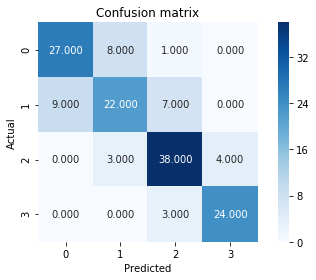

In [176]:

# compute accuracy
accuracy = metrics.accuracy_score(Ytest, Ypred)
error = 1 - metrics.accuracy_score(Ytest, Ypred)
precision = metrics.precision_score(Ytest, Ypred, average = None)
recall = metrics.recall_score(Ytest, Ypred, average = None)
F1_score = metrics.f1_score(Ytest, Ypred, average = None)

print("accuracy=",accuracy, "\nerror=", error, "\nprecision=", precision, "\nrecall=",recall, "\nF1_score=", F1_score)
conf_matrix = metrics.confusion_matrix(Ytest, Ypred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [163]:
# KNeighborsClassifier -  With feature selection of top 6 columns with highest correlation coefficient
X = X[top_six_columns]
Y = data_train['SaleClass']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.1, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)

Xtest = scaler.transform(Xtest)

bestAccuracy = 0
bestY_Pred = []
# bestY_Val = []
Ypred = []
for n in range(1,20):
    for train, val in kfold.split(X):
        x_train = X.iloc[train]
        x_val = X.iloc[val]
        y_train = Y.iloc[train]
        y_val = Y.iloc[val]

        x_train = scaler.transform(x_train)
        x_val = scaler.transform(x_val)
        classifier = KNeighborsClassifier(n)
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_val)    
        accuracy = metrics.accuracy_score(y_val, y_pred)
        if bestAccuracy < accuracy:
            bestAccuracy = accuracy
            bestY_Pred = y_pred     
            bestY_Val = y_val  
            Ypred = classifier.predict(Xtest)  
        
    error = 1 - bestAccuracy
    precision = metrics.precision_score(bestY_Val, bestY_Pred, average = None)
    recall = metrics.recall_score(bestY_Val, bestY_Pred, average = None)
    F1_score = metrics.f1_score(bestY_Val, bestY_Pred, average = None)
    print("Neighbour:",n)
    print("Accuracy",bestAccuracy)
    print("Error",error)
    print("Precision",precision)
    print("Recall",recall)
    print("F1 Score",F1_score)
    print("")
    
# With the Top 6 features and no of neighbours=6 we get the best results 

Neighbour: 1
Accuracy 0.6746575342465754
Error 0.3253424657534246
Precision [0.67605634 0.61764706 0.61111111 0.77777778]
Recall [0.76190476 0.58333333 0.54320988 0.82894737]
F1 Score [0.71641791 0.6        0.5751634  0.80254777]

Neighbour: 2
Accuracy 0.6746575342465754
Error 0.3253424657534246
Precision [0.67605634 0.61764706 0.61111111 0.77777778]
Recall [0.76190476 0.58333333 0.54320988 0.82894737]
F1 Score [0.71641791 0.6        0.5751634  0.80254777]

Neighbour: 3
Accuracy 0.702054794520548
Error 0.297945205479452
Precision [0.64556962 0.63768116 0.6984127  0.81481481]
Recall [0.80952381 0.61111111 0.54320988 0.86842105]
F1 Score [0.71830986 0.62411348 0.61111111 0.84076433]

Neighbour: 4
Accuracy 0.7226027397260274
Error 0.2773972602739726
Precision [0.76470588 0.64556962 0.63953488 0.89830508]
Recall [0.73239437 0.67105263 0.76388889 0.7260274 ]
F1 Score [0.74820144 0.65806452 0.69620253 0.8030303 ]

Neighbour: 5
Accuracy 0.7363013698630136
Error 0.26369863013698636
Precision [

accuracy= 0.7602739726027398 
error= 0.23972602739726023 
precision= [0.73170732 0.67647059 0.78723404 0.875     ] 
recall= [0.83333333 0.60526316 0.82222222 0.77777778] 
F1_score= [0.77922078 0.63888889 0.80434783 0.82352941]


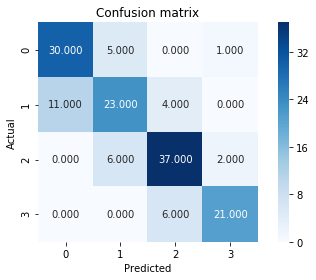

In [166]:
# y_pred = topClassifier.predict(Xtest)

# compute accuracy
accuracy = metrics.accuracy_score(Ytest, Ypred)
error = 1 - metrics.accuracy_score(Ytest, Ypred)
precision = metrics.precision_score(Ytest, Ypred, average = None)
recall = metrics.recall_score(Ytest, Ypred, average = None)
F1_score = metrics.f1_score(Ytest, Ypred, average = None)

print("accuracy=",accuracy, "\nerror=", error, "\nprecision=", precision, "\nrecall=",recall, "\nF1_score=", F1_score)

conf_matrix = metrics.confusion_matrix(Ytest, Ypred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [167]:
# Gaussian Naive Bayes With feature selection of top 6 columns with highest correlation coefficient
X = data_train[top_six_columns]
Y = data_train['SaleClass']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.1, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)

Xtest = scaler.transform(Xtest)

bestAccuracy = 0
bestY_Pred = []
topClassifer = GaussianNB()
# bestY_Val = []
Ypred = []
for train, val in kfold.split(X):
    x_train = X.iloc[train]
    x_val = X.iloc[val]
    y_train = Y.iloc[train]
    y_val = Y.iloc[val]

    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)
    classifier = GaussianNB()  
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    accuracy = metrics.accuracy_score(y_val, y_pred)
    if bestAccuracy < accuracy:
        bestAccuracy = accuracy
        bestY_Pred = y_pred     
        bestY_Val = y_val     
        Ypred = classifier.predict(Xtest)

error = 1 - bestAccuracy
precision = metrics.precision_score(bestY_Val, bestY_Pred, average = None)
recall = metrics.recall_score(bestY_Val, bestY_Pred, average = None)
F1_score = metrics.f1_score(bestY_Val, bestY_Pred, average = None)
print("Accuracy",bestAccuracy)
print("Error",error)
print("Precision",precision)
print("Recall",recall)
print("F1 Score",F1_score)
print("")

Accuracy 0.702054794520548
Error 0.297945205479452
Precision [0.85714286 0.5483871  0.55789474 0.89230769]
Recall [0.74074074 0.53125    0.76811594 0.74358974]
F1 Score [0.79470199 0.53968254 0.64634146 0.81118881]



accuracy= 0.726027397260274 
error= 0.273972602739726 
precision= [0.8125    0.65      0.7173913 0.75     ] 
recall= [0.72222222 0.68421053 0.73333333 0.77777778] 
F1_score= [0.76470588 0.66666667 0.72527473 0.76363636]


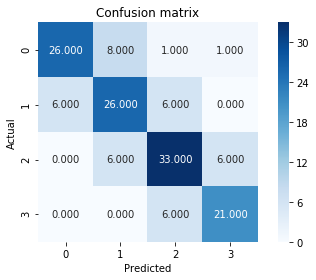

In [168]:

# compute accuracy
accuracy = metrics.accuracy_score(Ytest, Ypred)
error = 1 - metrics.accuracy_score(Ytest, Ypred)
precision = metrics.precision_score(Ytest, Ypred, average = None)
recall = metrics.recall_score(Ytest, Ypred, average = None)
F1_score = metrics.f1_score(Ytest, Ypred, average = None)

print("accuracy=",accuracy, "\nerror=", error, "\nprecision=", precision, "\nrecall=",recall, "\nF1_score=", F1_score)

conf_matrix = metrics.confusion_matrix(Ytest, Ypred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [169]:
# Bernoulli Naive Bayes With feature selection of top 6 columns with highest correlation coefficient
X = data_train[top_six_columns]
Y = data_train['SaleClass']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.1, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)

Xtest = scaler.transform(Xtest)

bestAccuracy = 0
bestY_Pred = []
bestY_Val = []
topClassifier = BernoulliNB() 
Ypred = []
for train, val in kfold.split(X):
    x_train = X.iloc[train]
    x_val = X.iloc[val]
    y_train = Y.iloc[train]
    y_val = Y.iloc[val]

    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)
    classifier = BernoulliNB()  
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    accuracy = metrics.accuracy_score(y_val, y_pred)
    if bestAccuracy < accuracy:
        bestAccuracy = accuracy
        bestY_Pred = y_pred     
        bestY_Val = y_val     
        Ypred = classifier.predict(Xtest)
        
error = 1 - bestAccuracy
precision = metrics.precision_score(bestY_Val, bestY_Pred, average = None)
recall = metrics.recall_score(bestY_Val, bestY_Pred, average = None)
F1_score = metrics.f1_score(bestY_Val, bestY_Pred, average = None)
print("Accuracy",bestAccuracy)
print("Error",error)
print("Precision",precision)
print("Recall",recall)
print("F1 Score",F1_score)
print("")

Accuracy 0.6335616438356164
Error 0.3664383561643836
Precision [0.73333333 0.46666667 0.53333333 0.75609756]
Recall [0.67901235 0.4375     0.57971014 0.79487179]
F1 Score [0.70512821 0.4516129  0.55555556 0.775     ]



accuracy= 0.6164383561643836 
error= 0.3835616438356164 
precision= [0.6        0.54285714 0.67567568 0.64705882] 
recall= [0.66666667 0.5        0.55555556 0.81481481] 
F1_score= [0.63157895 0.52054795 0.6097561  0.72131148]


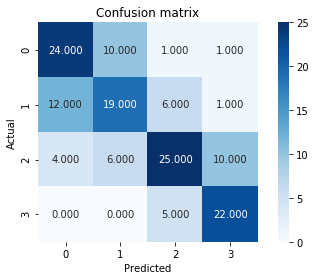

In [170]:

# compute accuracy
accuracy = metrics.accuracy_score(Ytest, Ypred)
error = 1 - metrics.accuracy_score(Ytest, Ypred)
precision = metrics.precision_score(Ytest, Ypred, average = None)
recall = metrics.recall_score(Ytest, Ypred, average = None)
F1_score = metrics.f1_score(Ytest, Ypred, average = None)

print("accuracy=",accuracy, "\nerror=", error, "\nprecision=", precision, "\nrecall=",recall, "\nF1_score=", F1_score)

conf_matrix = metrics.confusion_matrix(Ytest, Ypred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [171]:
# Linear SVM With feature selection of top 6 columns with highest correlation coefficient
X = data_train[top_six_columns]
Y = data_train['SaleClass']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.1, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)

Xtest = scaler.transform(Xtest)

bestAccuracy = 0
bestY_Pred = []
# bestY_Val = []
Ypred = []
topClassifier = SVC(kernel = 'linear')
for train, val in kfold.split(X):
    x_train = X.iloc[train]
    x_val = X.iloc[val]
    y_train = Y.iloc[train]
    y_val = Y.iloc[val]

    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)
    classifier = SVC(kernel = 'linear')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    accuracy = metrics.accuracy_score(y_val, y_pred)
    if bestAccuracy < accuracy:
        bestAccuracy = accuracy
        bestY_Pred = y_pred     
        bestY_Val = y_val     
        Ypred = classifier.predict(Xtest)
        
error = 1 - bestAccuracy
precision = metrics.precision_score(bestY_Val, bestY_Pred, average = None)
recall = metrics.recall_score(bestY_Val, bestY_Pred, average = None)
F1_score = metrics.f1_score(bestY_Val, bestY_Pred, average = None)
print("Accuracy",bestAccuracy)
print("Error",error)
print("Precision",precision)
print("Recall",recall)
print("F1 Score",F1_score)
print("")

Accuracy 0.7363013698630136
Error 0.26369863013698636
Precision [0.78571429 0.58730159 0.70930233 0.86440678]
Recall [0.76744186 0.54411765 0.81333333 0.80952381]
F1 Score [0.77647059 0.5648855  0.75776398 0.83606557]



accuracy= 0.7671232876712328 
error= 0.23287671232876717 
precision= [0.75       0.6875     0.78       0.85714286] 
recall= [0.75       0.57894737 0.86666667 0.88888889] 
F1_score= [0.75       0.62857143 0.82105263 0.87272727]


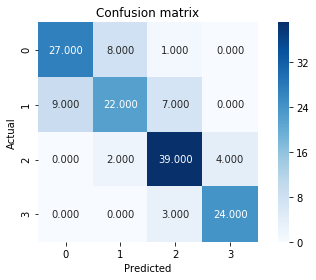

In [172]:

# compute accuracy
accuracy = metrics.accuracy_score(Ytest, Ypred)
error = 1 - metrics.accuracy_score(Ytest, Ypred)
precision = metrics.precision_score(Ytest, Ypred, average = None)
recall = metrics.recall_score(Ytest, Ypred, average = None)
F1_score = metrics.f1_score(Ytest, Ypred, average = None)

print("accuracy=",accuracy, "\nerror=", error, "\nprecision=", precision, "\nrecall=",recall, "\nF1_score=", F1_score)

conf_matrix = metrics.confusion_matrix(Ytest, Ypred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [174]:
# RBF SVM With feature selection of top 6 columns with highest correlation coefficient
X = data_train[top_six_columns]
Y = data_train['SaleClass']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.1, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)

Xtest = scaler.transform(Xtest)

bestAccuracy = 0
bestY_Pred = []
# bestY_Val = []
Ypred = []
for train, val in kfold.split(X):
    x_train = X.iloc[train]
    x_val = X.iloc[val]
    y_train = Y.iloc[train]
    y_val = Y.iloc[val]

    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)
    classifier = SVC(kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    accuracy = metrics.accuracy_score(y_val, y_pred)
    if bestAccuracy < accuracy:
        bestAccuracy = accuracy
        bestY_Pred = y_pred     
        bestY_Val = y_val
        bestX_Train = x_train
        Ypred = classifier.predict(Xtest)

error = 1 - bestAccuracy
precision = metrics.precision_score(bestY_Val, bestY_Pred, average = None)
recall = metrics.recall_score(bestY_Val, bestY_Pred, average = None)
F1_score = metrics.f1_score(bestY_Val, bestY_Pred, average = None)
print("Accuracy",bestAccuracy)
print("Error",error)
print("Precision",precision)
print("Recall",recall)
print("F1 Score",F1_score)
print("")
#Best accuracy = 0.7568493150684932

# determine the complexity of RBF SVM classifier by computing the percentage of support vectors
print("Complexity of SVM with RBF Kernel")
len(classifier.support_vectors_)/len(bestX_Train)

Accuracy 0.7568493150684932
Error 0.24315068493150682
Precision [0.85       0.70149254 0.64516129 0.875     ]
Recall [0.71830986 0.61842105 0.83333333 0.8630137 ]
F1 Score [0.77862595 0.65734266 0.72727273 0.86896552]

Complexity of SVM with RBF Kernel


0.6866438356164384

accuracy= 0.7602739726027398 
error= 0.23972602739726023 
precision= [0.75       0.66666667 0.7755102  0.85714286] 
recall= [0.75       0.57894737 0.84444444 0.88888889] 
F1_score= [0.75       0.61971831 0.80851064 0.87272727]


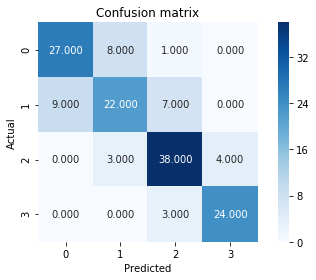

In [175]:

# compute accuracy
accuracy = metrics.accuracy_score(Ytest, Ypred)
error = 1 - metrics.accuracy_score(Ytest, Ypred)
precision = metrics.precision_score(Ytest, Ypred, average = None)
recall = metrics.recall_score(Ytest, Ypred, average = None)
F1_score = metrics.f1_score(Ytest, Ypred, average = None)

print("accuracy=",accuracy, "\nerror=", error, "\nprecision=", precision, "\nrecall=",recall, "\nF1_score=", F1_score)

conf_matrix = metrics.confusion_matrix(Ytest, Ypred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [39]:
a = [[0 for x in range(10)] for y in range(10)] 

In [40]:
a[0][1] = 1
a[0][3] = 1
a[1][4] = 1
a[2][3] = 1
a[2][6] = 1
a[5][6] = 1
a[5][7] = 1
a[6][7] = 1
a[7][9] = 1
a[8][9] = 1


In [43]:
a[1][0] = 1
a[3][0] = 1
a[4][1] = 1
a[3][2] = 1
a[6][2] = 1
a[6][5] = 1
a[7][5] = 1
a[7][6] = 1
a[9][7] = 1
a[9][8] = 1

In [45]:
print(a)

[[0, 1, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]]


In [50]:
print(np.linalg.eig(a))
eigenValues, eigenVectors = np.linalg.eig(a)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
print(eigenValues)

(array([ 2.37277584,  1.72266771,  1.18321304,  0.87623891,  0.12562039,
       -1.9062331 , -1.6578633 , -1.39039813, -0.55306997, -0.7729514 ]), array([[ 0.08688483,  0.556512  ,  0.12802566,  0.08779153, -0.51196041,
         0.36760119,  0.33758481, -0.30073694,  0.16293168,  0.17452924],
       [ 0.04452599,  0.4872398 ,  0.37871059, -0.33128584,  0.06534382,
        -0.26606182, -0.32008352,  0.44807218,  0.12982402,  0.33512337],
       [ 0.29663225,  0.25563186, -0.39688593,  0.26989988,  0.49567291,
         0.46098447,  0.05961594,  0.34234892, -0.04129133,  0.188778  ],
       [ 0.16163224,  0.47144545, -0.22722897,  0.4082122 , -0.12965649,
        -0.43467174, -0.23958595, -0.02992811, -0.21993664, -0.47002599],
       [ 0.01876536,  0.28284027,  0.32006966, -0.37807707,  0.52016893,
         0.13957465,  0.19306991, -0.32226178, -0.23473345, -0.43356331],
       [ 0.4542606 , -0.12496692, -0.06058181, -0.31556697, -0.2484322 ,
         0.0646099 ,  0.23137143,  0.43084935

In [55]:
b = [[0 for x in range(10)] for y in range(10)] 

In [56]:
b[0][1] = 1
b[1][0] = 1
b[1][4] = 1
b[4][1] = 1
b[8][9] = 1
b[9][8] = 1

In [59]:
print(np.linalg.eig(b))
eigenValues, eigenVectors = np.linalg.eig(b)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
print(eigenValues)

(array([-1.41421356e+00,  9.77950360e-17,  1.41421356e+00,  1.00000000e+00,
       -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00]), array([[ 5.00000000e-01,  7.07106781e-01, -5.00000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-7.07106781e-01,  9.06753788e-17, -7.07106781e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e